In [1]:
import ROOT as r
from ROOT import TFile, TTree, TH1F, TCanvas, TMath, TLegend
from array import array
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%matplotlib widget
%matplotlib inline
import uproot
%jsroot on 

Welcome to JupyROOT 6.22/06


## Study Lb->LcXc

In [2]:
folder = '/Users/annarita/cernbox/LHCbDatasets/MC_TrackerOnly/'
t = uproot.open(folder+'Lb_LcDs_MagUp.root:tupleout/DecayTree')
tpresel = uproot.open(folder+'Lb_Lcmunu_MagUp_preselectionVars.root:DecayTree')

In [3]:
def ScaleHisto(h,value):
    scale = value/h.Integral()
    h.Scale(scale)
    return h

In [4]:
def GetName(fitvar):
    if fitvar=='q2':
        return 'FitVar_q2_mLc'
    elif fitvar=='El':
        return 'FitVar_El_mLc'
    elif fitvar=='MM':
        return 'FitVar_Mmiss2_mLc'
    else:
        print('Variable not found')

In [5]:
variables = ['Lb_IPCHI2_OWNPV', 'Lb_IP_OWNPV', 'Lb_TRUEP_X','Lb_TRUEP_Y','Lb_TRUEP_Z','Lb_BKGCAT','Lc_BKGCAT',
            'Lb_TRUEID', 'Lc_TRUEID', 'mu_TRUEID', 'mu_MC_MOTHER_ID','Lb_P','Lb_PT','Lc_M','mu_PT','mu_P','p_P',
             'p_PT','K_P','K_PT','pi_P','pi_PT','FitVar_El_mLc','FitVar_q2_mLc','FitVar_Mmiss2_mLc',
             'Lb_ISOLATION_BDT','Lb_ISOLATION_BDT2','Lb_ISOLATION_BDT3','Lb_ISOLATION_TruePID',
             'Lb_ISOLATION_TruePID2','Lb_ISOLATION_TruePID3','Lb_ISOLATION_TrueMotherPID',
             'Lb_ISOLATION_TrueMotherPID2','Lb_ISOLATION_TrueMotherPID3','Lb_ISOLATION_TrueGrandmotherPID',
             'Lb_ISOLATION_TrueGrandmotherPID2','Lb_ISOLATION_TrueGrandmotherPID3']
df = t.arrays(variables, library="pd")

In [6]:
df

,Lb_IPCHI2_OWNPV,Lb_IP_OWNPV,Lb_TRUEP_X,Lb_TRUEP_Y,Lb_TRUEP_Z,Lb_BKGCAT,Lc_BKGCAT,Lb_TRUEID,Lc_TRUEID,mu_TRUEID,...,Lb_ISOLATION_BDT3,Lb_ISOLATION_TruePID,Lb_ISOLATION_TruePID2,Lb_ISOLATION_TruePID3,Lb_ISOLATION_TrueMotherPID,Lb_ISOLATION_TrueMotherPID2,Lb_ISOLATION_TrueMotherPID3,Lb_ISOLATION_TrueGrandmotherPID,Lb_ISOLATION_TrueGrandmotherPID2,Lb_ISOLATION_TrueGrandmotherPID3
0,46.237917,0.133232,861.08,-8949.86,51479.93,40,0,5122,4122,13,...,-0.538102,-321,0,211,5122,0,323,5214,0,0
1,8.797902,0.045204,-9155.36,2165.33,69458.47,40,0,5122,4122,13,...,-0.532347,-13,0,0,521,0,0,523,0,0
2,7.552060,0.041658,-9155.36,2165.33,69458.47,40,40,5122,5122,211,...,-0.416917,0,-13,0,0,521,0,0,523,0
3,17.848903,0.051664,-11793.03,383.18,158673.43,40,40,5122,5122,-321,...,0.097560,13,0,321,-421,0,-421,-423,0,-423
4,34.358690,0.074441,-11793.03,383.18,158673.43,40,40,5122,5122,-321,...,0.198633,13,211,2212,-421,521,4122,-423,523,5122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17911626,39.929890,0.091270,-6689.09,4244.60,127662.10,40,0,-5122,-4122,-13,...,-0.279992,321,-321,-211,323,421,-5222,-5122,423,-5
17911627,48.690993,0.112676,-6689.09,4244.60,127662.10,40,40,-5122,-5122,321,...,-0.279992,-13,-211,-211,421,-4122,-5222,423,-5122,-5
17911628,39.709848,0.091411,-6689.09,4244.60,127662.10,40,40,-5122,-5122,321,...,-0.110998,321,-321,-211,323,421,-5222,-5122,423,-5
17911629,6.649012,0.067311,0.00,0.00,0.00,110,40,0,521,-321,...,-0.040395,211,-321,211,2224,0,0,0,0,0


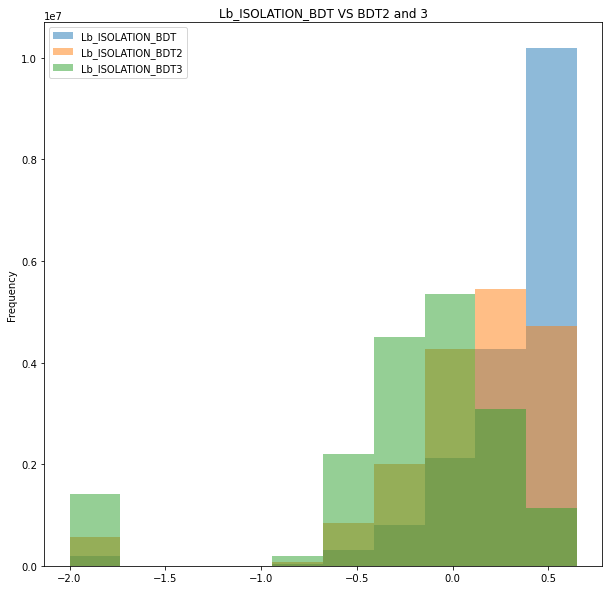

In [7]:
df1 = df[['Lb_ISOLATION_BDT','Lb_ISOLATION_BDT2','Lb_ISOLATION_BDT3']]
ax = df1.plot.hist(alpha=0.5, figsize=(10,10),bins=10, title = "Lb_ISOLATION_BDT VS BDT2 and 3")

In [8]:
dfp = tpresel.arrays(library='pd')

In [9]:
dfp.head()

,TruthMatch,MoreHLT2Sel,L0,HLT1,Trigger,LcMass,PIDCalib,Preselection,PassBDT,FinalSel,isKenriched,isIsolated,isLcpipi,w_LbCorr,Event_FFcorr
0,True,True,False,True,False,True,True,False,True,False,False,True,False,0.801175,0.975051
1,False,True,False,True,False,True,True,False,True,False,False,True,False,0.000000,0.000000
2,True,False,False,True,False,True,True,False,True,False,False,True,False,1.580978,0.963524
3,True,False,False,True,False,True,True,False,True,False,False,True,False,1.108694,1.136428
4,False,True,False,True,False,False,True,False,False,False,False,True,False,0.000000,0.000000


In [10]:
dft = pd.concat([df, dfp], axis=1, join='inner')
dft.head()

,Lb_IPCHI2_OWNPV,Lb_IP_OWNPV,Lb_TRUEP_X,Lb_TRUEP_Y,Lb_TRUEP_Z,Lb_BKGCAT,Lc_BKGCAT,Lb_TRUEID,Lc_TRUEID,mu_TRUEID,...,LcMass,PIDCalib,Preselection,PassBDT,FinalSel,isKenriched,isIsolated,isLcpipi,w_LbCorr,Event_FFcorr
0,46.237917,0.133232,861.08,-8949.86,51479.93,40,0,5122,4122,13,...,True,True,False,True,False,False,True,False,0.801175,0.975051
1,8.797902,0.045204,-9155.36,2165.33,69458.47,40,0,5122,4122,13,...,True,True,False,True,False,False,True,False,0.000000,0.000000
2,7.552060,0.041658,-9155.36,2165.33,69458.47,40,40,5122,5122,211,...,True,True,False,True,False,False,True,False,1.580978,0.963524
3,17.848903,0.051664,-11793.03,383.18,158673.43,40,40,5122,5122,-321,...,True,True,False,True,False,False,True,False,1.108694,1.136428
4,34.358690,0.074441,-11793.03,383.18,158673.43,40,40,5122,5122,-321,...,False,True,False,False,False,False,True,False,0.000000,0.000000


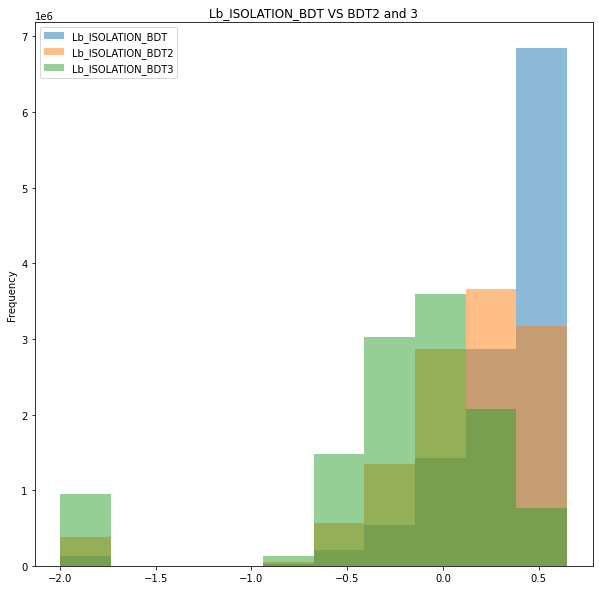

In [11]:
#Apply truth match
df1 = dft.loc[dft.TruthMatch]
df1 = df1[['Lb_ISOLATION_BDT','Lb_ISOLATION_BDT2','Lb_ISOLATION_BDT3']]
ax = df1.plot.hist(alpha=0.5, figsize=(10,10),bins=10, title = "Lb_ISOLATION_BDT VS BDT2 and 3")

In [12]:
df1.shape

(12030403, 3)

In [13]:
dft.shape

(17911631, 52)

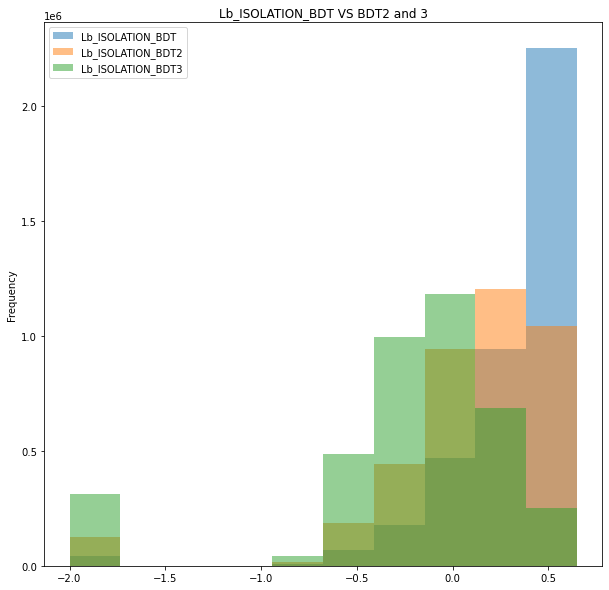

In [14]:
#Apply all preselection steps (truth match, trigger, lc mass, bdt)
df2 = dft.loc[dft.Preselection]
df2a = df2[['Lb_ISOLATION_BDT','Lb_ISOLATION_BDT2','Lb_ISOLATION_BDT3']]
ax = df2a.plot.hist(alpha=0.5, figsize=(10,10),bins=10, title = "Lb_ISOLATION_BDT VS BDT2 and 3")

In [15]:
df2.shape
df2b = df2[df2['Lb_ISOLATION_TrueMotherPID']!=0]
df2b = df2b[df2b['Lb_ISOLATION_TrueMotherPID']<400]

In [16]:
df2b['Lb_ISOLATION_TrueMotherPID']

18            15
21           221
44           223
45            22
47           313
            ... 
17911603    -313
17911610   -4122
17911612     113
17911621     323
17911628     323
Name: Lb_ISOLATION_TrueMotherPID, Length: 1952939, dtype: int32

<AxesSubplot:title={'center':'TrueMotherID'}, ylabel='Frequency'>

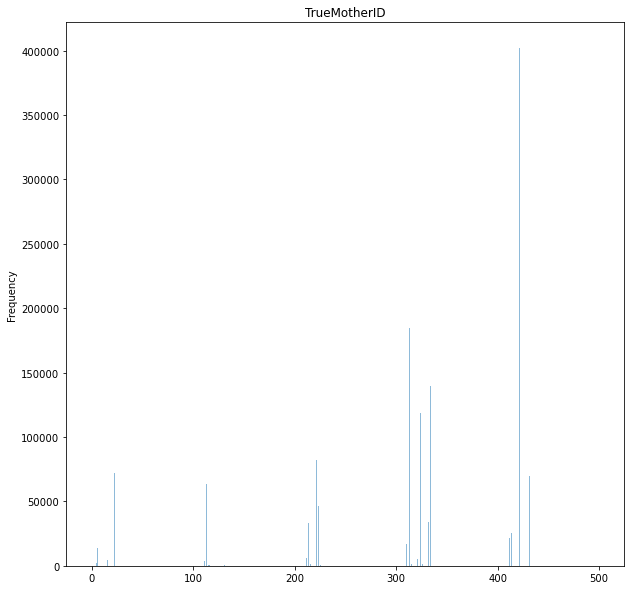

In [17]:
abs(df2b['Lb_ISOLATION_TrueMotherPID']).plot.hist(alpha=0.5, range=(0,500), bins=500, figsize=(10,10), title = "TrueMotherID")

830354 3956851 20.985222845136196


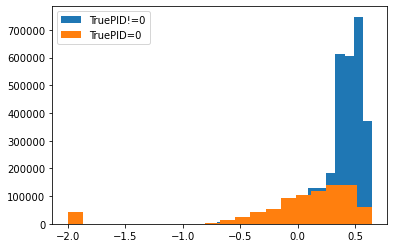

In [18]:
#number of particles with TruePID=0
n_PID_0 = df2[df2['Lb_ISOLATION_TruePID']==0].shape[0]
print(n_PID_0,df2.shape[0],(n_PID_0/df2.shape[0])*100)
x = df2.loc[df2['Lb_ISOLATION_TruePID']==0]
y = df2.loc[df2['Lb_ISOLATION_TruePID']!=0]
plt.hist(y['Lb_ISOLATION_BDT'], bins=20, label = 'TruePID!=0')
plt.hist(x['Lb_ISOLATION_BDT'], bins=20, label = 'TruePID=0')
plt.legend()
plt.show()

1202774 3956851 30.397252764888037


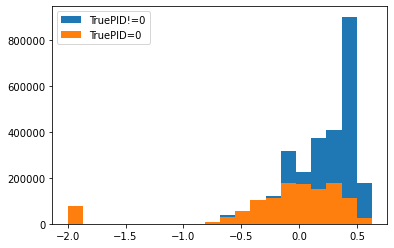

In [19]:
#number of particles with TruePID2=0
n_PID2_0 = df2[df2['Lb_ISOLATION_TruePID2']==0].shape[0]
print(n_PID2_0,df2.shape[0],(n_PID2_0/df2.shape[0])*100)
x2 = df2.loc[df2['Lb_ISOLATION_TruePID2']==0]
y2 = df2.loc[df2['Lb_ISOLATION_TruePID2']!=0]
plt.hist(y2['Lb_ISOLATION_BDT2'],bins=20, label = 'TruePID!=0')
plt.hist(x2['Lb_ISOLATION_BDT2'],bins=20, label = 'TruePID=0')
plt.legend()
plt.show()

1819426 3956851 45.981665723576654


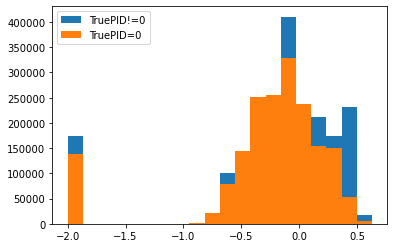

In [20]:
#number of particles with TruePID3=0
n_PID3_0 = df2[df2['Lb_ISOLATION_TruePID3']==0].shape[0]
print(n_PID3_0,df2.shape[0],(n_PID3_0/df2.shape[0])*100)
x3 = df2.loc[df2['Lb_ISOLATION_TruePID3']==0]
y3 = df2.loc[df2['Lb_ISOLATION_TruePID3']!=0]
plt.hist(y3['Lb_ISOLATION_BDT3'], bins=20, label = 'TruePID!=0')
plt.hist(x3['Lb_ISOLATION_BDT3'], bins=20, label = 'TruePID=0')
plt.legend()
plt.show()

#### Look at Fit variables in Isolated region eliminating particles with PID=0

Create isolated dataframes with cut Lb_ISOLATION_BDT>0.35

In [21]:
df2iso = df2.loc[df2['Lb_ISOLATION_BDT']>0.35]
x = df2iso.loc[df2iso['Lb_ISOLATION_TruePID']==0]
y = df2iso.loc[df2iso['Lb_ISOLATION_TruePID']!=0]

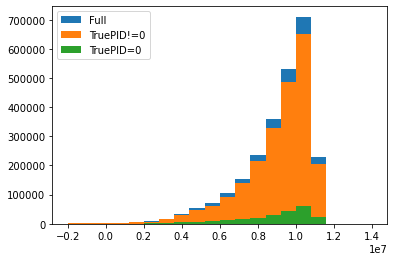

In [22]:
plt.hist(df2iso[GetName('q2')], bins=20, range=(-2e6,14e6), label = 'Full')
plt.hist(y[GetName('q2')], bins=20, range=(-2e6,14e6),label = 'TruePID!=0')
plt.hist(x[GetName('q2')], bins=20, range=(-2e6,14e6), label = 'TruePID=0')
plt.legend()
plt.show()

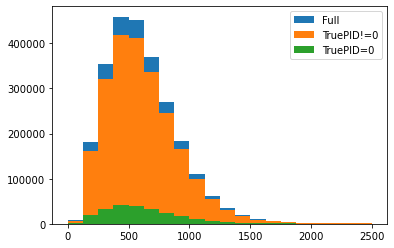

In [23]:
plt.hist(df2iso[GetName('El')], bins=20, range=(0,2500), label = 'Full')
plt.hist(y[GetName('El')], bins=20, range=(0,2500),label = 'TruePID!=0')
plt.hist(x[GetName('El')], bins=20, range=(0,2500), label = 'TruePID=0')
plt.legend()
plt.show()

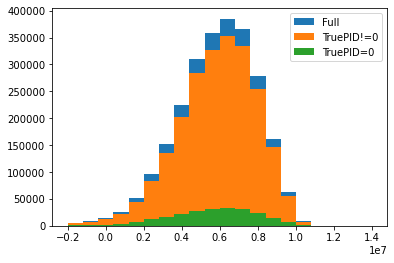

In [24]:
plt.hist(df2iso[GetName('MM')], bins=20, range=(-2e6,14e6), label = 'Full')
plt.hist(y[GetName('MM')], bins=20, range=(-2e6,14e6),label = 'TruePID!=0')
plt.hist(x[GetName('MM')], bins=20, range=(-2e6,14e6), label = 'TruePID=0')
plt.legend()
plt.show()

#### Look at the anti-isolated region

I am currently onlu selecting the opposite of the isolated one, not placing any requirement on the particles of the decay

In [25]:
df2aiso = df2.loc[df2['Lb_ISOLATION_BDT']<0.35]
x = df2aiso.loc[df2aiso['Lb_ISOLATION_TruePID']==0]
y = df2aiso.loc[df2aiso['Lb_ISOLATION_TruePID']!=0]

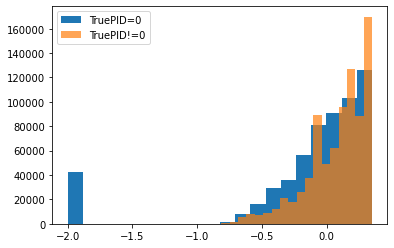

In [26]:
plt.hist(x['Lb_ISOLATION_BDT'], bins=20, label = 'TruePID=0')
plt.hist(y['Lb_ISOLATION_BDT'], alpha=0.7, bins=20, label = 'TruePID!=0')
plt.legend()
plt.show()

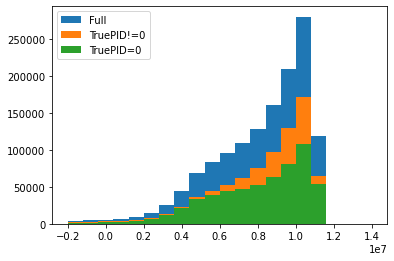

In [27]:
plt.hist(df2aiso[GetName('q2')], bins=20, range=(-2e6,14e6), label = 'Full')
plt.hist(y[GetName('q2')], bins=20, range=(-2e6,14e6),label = 'TruePID!=0')
plt.hist(x[GetName('q2')], bins=20, range=(-2e6,14e6), label = 'TruePID=0')
plt.legend()
plt.show()

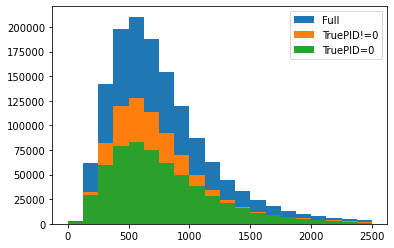

In [28]:
plt.hist(df2aiso[GetName('El')], bins=20, range=(0,2500), label = 'Full')
plt.hist(y[GetName('El')], bins=20, range=(0,2500),label = 'TruePID!=0')
plt.hist(x[GetName('El')], bins=20, range=(0,2500), label = 'TruePID=0')
plt.legend()
plt.show()

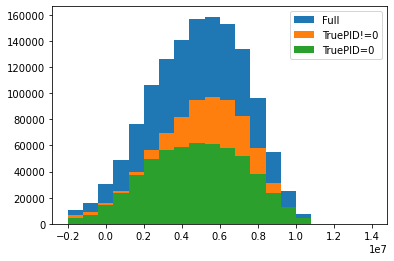

In [29]:
plt.hist(df2aiso[GetName('MM')], bins=20, range=(-2e6,14e6), label = 'Full')
plt.hist(y[GetName('MM')], bins=20, range=(-2e6,14e6),label = 'TruePID!=0')
plt.hist(x[GetName('MM')], bins=20, range=(-2e6,14e6), label = 'TruePID=0')
plt.legend()
plt.show()

### Try to study particle decays in the anti-isolated region

First of all, eliminate all particles with TruePID (1,2 or 3) equal to 0

In [30]:
df3 = df2aiso.loc[(df2aiso['Lb_ISOLATION_TruePID']!=0)&(df2aiso['Lb_ISOLATION_TruePID2']!=0)&
                 (df2aiso['Lb_ISOLATION_TruePID3']!=0)]

In [31]:
print('N anti-iso events before requirement on True PIDs: ', df2aiso.shape[0])
print('N anti-iso events after requirement on True PIDs: ', df3.shape[0])

N anti-iso events before requirement on True PIDs:  1418040
N anti-iso events after requirement on True PIDs:  318549


Let's require one of the three anti-isolated particles to have a K pdg code

In [32]:
PDGKaons = [130,310,311,321,313,323]
def SelectKaons(var, PDGKaons):
    print(var)
    for pdg in PDGKaons:
        if var==pdg:
            return True
        else:
            return False

In [33]:
k1 = df3.loc[SelectKaons(df3.Lb_ISOLATION_TruePID, PDGKaons)]
k1.shape[0]

44          211
45           11
94          211
199        -211
200        -211
           ... 
17911354   -211
17911370    211
17911497    211
17911525    321
17911603   -321
Name: Lb_ISOLATION_TruePID, Length: 318549, dtype: int32


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().